# Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Download all the available data files into dataframe

features = pd.read_csv("data/walmart-recruiting-store-sales-forecasting/features.csv.zip")
sample_submission = pd.read_csv("data/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip")
stores = pd.read_csv("data/walmart-recruiting-store-sales-forecasting/stores.csv")
test = pd.read_csv("data/walmart-recruiting-store-sales-forecasting/test.csv.zip")
train = pd.read_csv("data/walmart-recruiting-store-sales-forecasting/train.csv.zip")

In [3]:
#Method for performing all data preprocessing (used later in the 'Machine Learning algorithm' section)

def data_preprocessing(dtraintest, dfeatures, dstores, train_boolean):
    #Merge train with features
    merged_intermediate = dfeatures.merge(dtraintest, on=['Date', 'Store', 'IsHoliday'])
    
    #Merge merged_intermediate with stores
    merged = merged_intermediate.merge(stores, on=['Store'])

    #Create new columns for week number, year, day and weekday
    merged['week'] = pd.to_datetime(merged.Date).dt.week
    merged['year'] = pd.to_datetime(merged.Date).dt.year
    merged['day'] = pd.to_datetime(merged.Date).dt.day
    merged['weekday'] = pd.to_datetime(merged.Date).dt.dayofweek

    #Create column for BigHoliday
    merged['BigHoliday'] = 0
    merged.loc[merged['week'] == 47, 'BigHoliday'] = 1
    merged.loc[merged['week'] == 52, 'BigHoliday'] = 1

    #Change IsHoliday and Date to numeric format
    merged["IsHoliday"] = merged["IsHoliday"].astype(int)
    merged["Date"] = pd.to_datetime(merged["Date"]).dt.strftime("%Y%m%d")
    merged["Date"] = pd.to_numeric(merged["Date"],errors='ignore')

    #Perform One-Hot-Encoding of Type and then drop the original Type
    one_hot_cols = pd.get_dummies(merged['Type'], prefix='Type')
    merged = pd.concat([merged, one_hot_cols], axis=1)
    merged = merged.drop(columns=['Type'])

    #Fill NaN values in MarkDown columns with 0
    #merged['MarkDown1'] = merged['MarkDown1'].fillna(0)
    #merged['MarkDown2'] = merged['MarkDown2'].fillna(0)
    #merged['MarkDown3'] = merged['MarkDown3'].fillna(0)
    #merged['MarkDown4'] = merged['MarkDown4'].fillna(0)
    #merged['MarkDown5'] = merged['MarkDown5'].fillna(0)

    #Drop all MarkDown cols, because of many NaN values
    merged = merged.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

    #Split into target values (Y) and data values (X) (if training data)
    if (train_boolean == True):
         merged_target = merged['Weekly_Sales']
         merged_data = merged.drop(columns=['Weekly_Sales'])
         return merged_data, merged_target
    else:
        return merged

# Studying the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8D3D68EB0>,
      dtype=object)

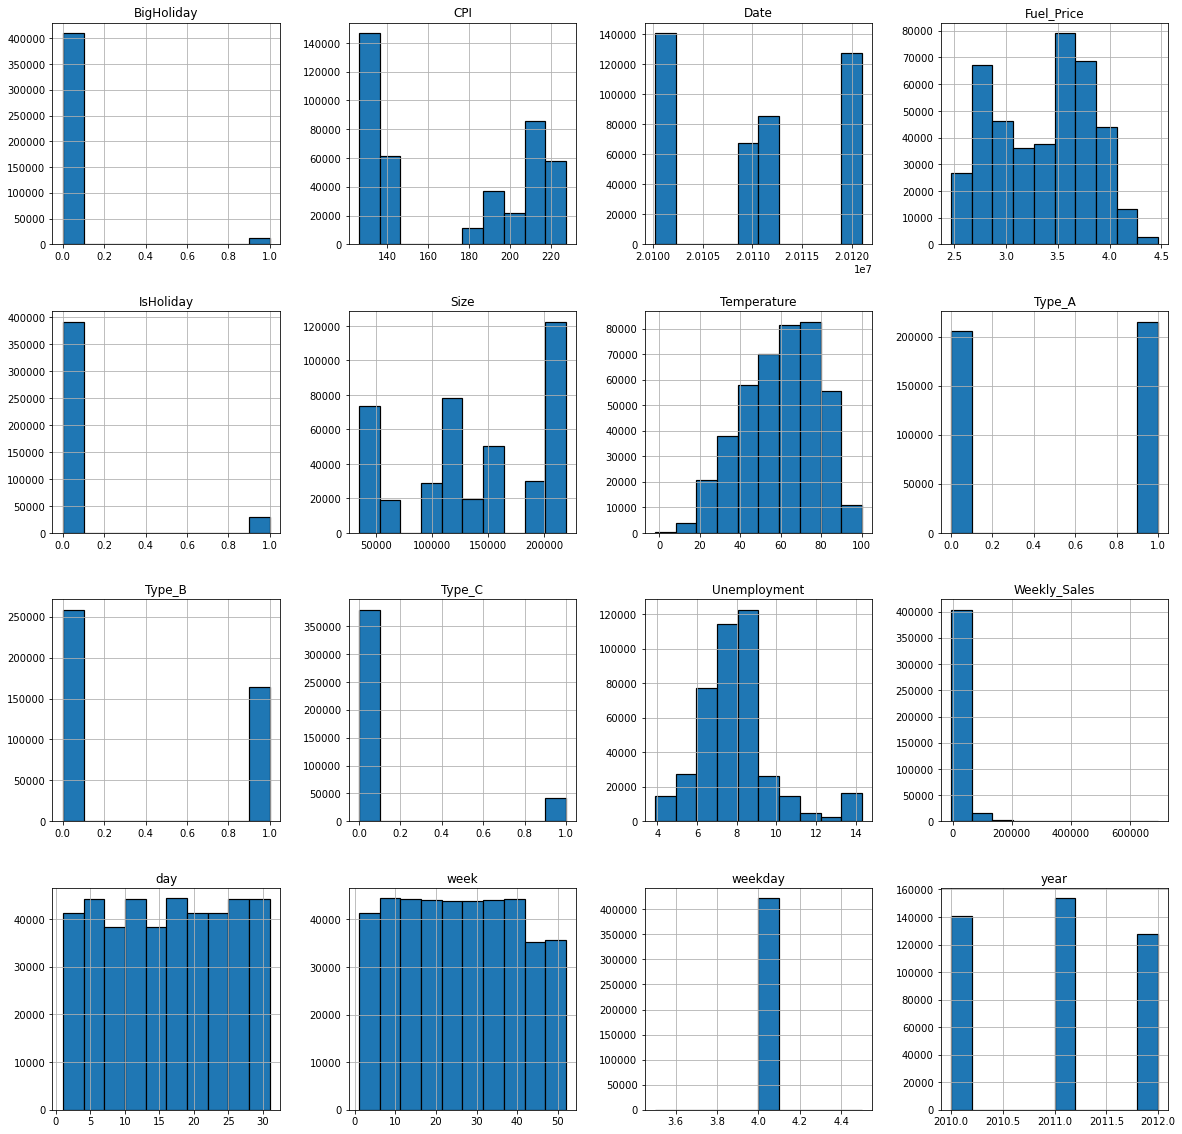

In [4]:
# Creating histograms for all features
data, target = data_preprocessing(train, features, stores, True)
merged = pd.concat([data, target], axis=1)
dateData = merged
#dateData = dateData.drop_duplicates(subset=['Date'], keep='last')
dateData = dateData.drop(columns=['Store', 'Dept'])
dateData
dateData.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [5]:
#Create dataframe with purpose of plotting the unemployment against the date
allData = features
allData['week'] = pd.to_datetime(allData.Date).dt.week
allData['year'] = pd.to_datetime(allData.Date).dt.year
allData["IsHoliday"] = allData["IsHoliday"].astype(int)
allData = allData.drop_duplicates(subset=['Date'], keep='last')

<function matplotlib.pyplot.show(*args, **kw)>

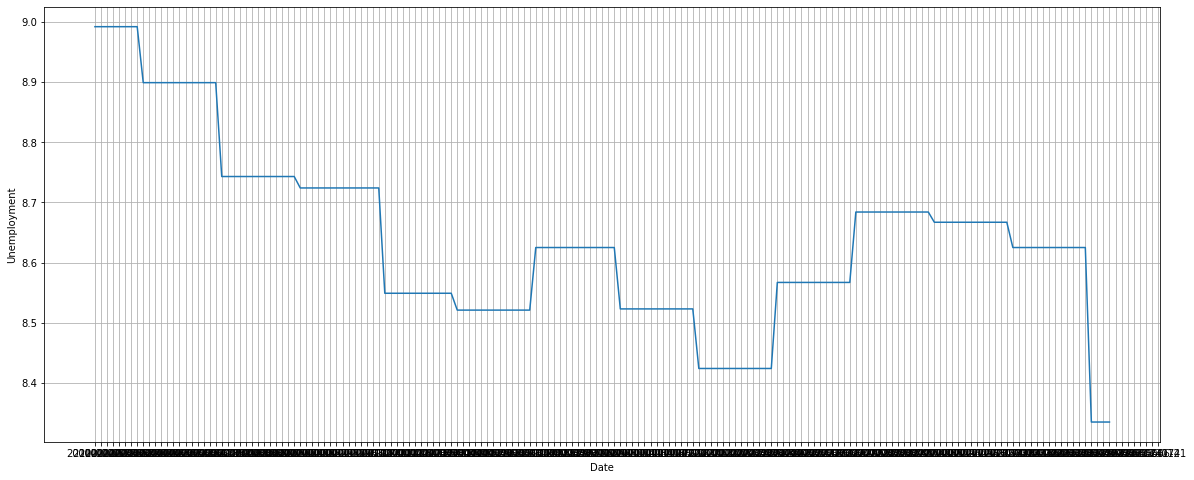

In [6]:
#Plot the unemployment against the date

plt.figure(figsize=(20,8))
plt.grid()
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.plot(allData['Date'],allData['Unemployment'], label = 'line 1')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

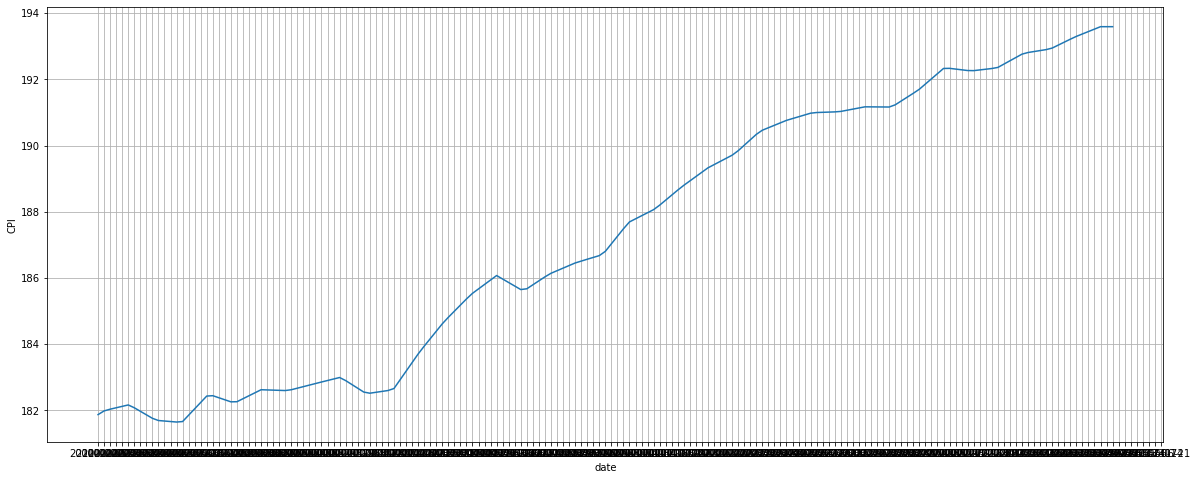

In [7]:
#Plot the CPI against the date

plt.figure(figsize=(20,8))
plt.grid()
plt.xlabel('date')
plt.ylabel('CPI')
plt.plot(allData['Date'],allData['CPI'], label = 'line 1')
plt.show

In [8]:
#Calculate the average annual growth of CPI

CPI2010 = allData[allData['week']==1].iloc[0][9]
CPI2011 = allData[allData['week']==1].iloc[1][9]
CPI2012 = allData[allData['week']==1].iloc[2][9]

annualGrowth1 = CPI2011/CPI2010
annualGrowth2 = CPI2012/CPI2011
(annualGrowth2 + annualGrowth1)/2-1

0.027219580588418335

In [9]:
#Split up the dataframe for each available year

sales_2010 = merged[merged['year']==2010]
sales_2011 = merged[merged['year']==2011]
sales_2012 = merged[merged['year']==2012]
sales_years = [sales_2010, sales_2011, sales_2012]

In [10]:
#Print the week numbers for each holiday

holidays = sales_2011[sales_2011['IsHoliday']==1]['week']
holidays = list( dict.fromkeys(holidays) ) 
print(holidays)

[6, 36, 47, 52]


In [11]:
total_data = []

for year in sales_years:
    avg_sales = []
    weeks = []

    for week in range(0,52):
        res = np.mean(year[year['week']==week]['Weekly_Sales'])
        avg_sales.append(res)
        weeks.append(week)

    total_data.append([avg_sales, weeks])

In [12]:
avg_sales = []
weeks = []

for week in range(0,52):
    res = np.mean(sales_2010[sales_2010['week']==week]['Weekly_Sales'])
    avg_sales.append(res)
    weeks.append(week)

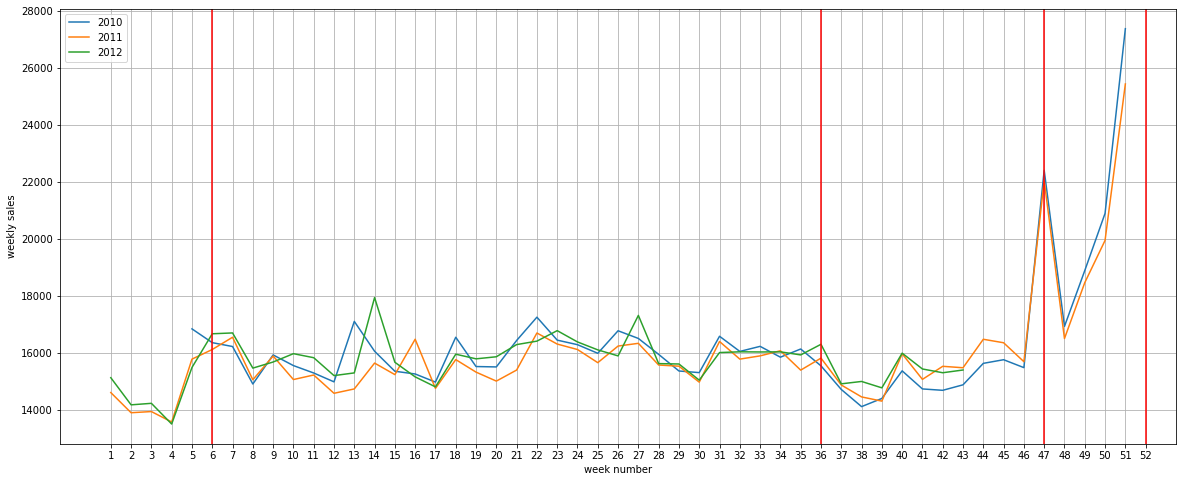

In [13]:
#Plot the weekly sales for each year and highlight the holidays by the red lines

plt.figure(figsize=(20,8))
plt.grid()
plt.xticks(np.arange(1, 53, step=1))

plt.plot(total_data[0][1], total_data[0][0], label = '2010') 
plt.plot(total_data[1][1], total_data[1][0], label = '2011') 
plt.plot(total_data[2][1], total_data[2][0], label = '2012') 
plt.xlabel('week number')
plt.ylabel('weekly sales')
plt.legend()
plt.axvline(x=holidays[0], color='r', linestyle='-')
plt.axvline(x=holidays[1], color='r', linestyle='-')
plt.axvline(x=holidays[2], color='r', linestyle='-')
plt.axvline(x=holidays[3], color='r', linestyle='-')
plt.show()

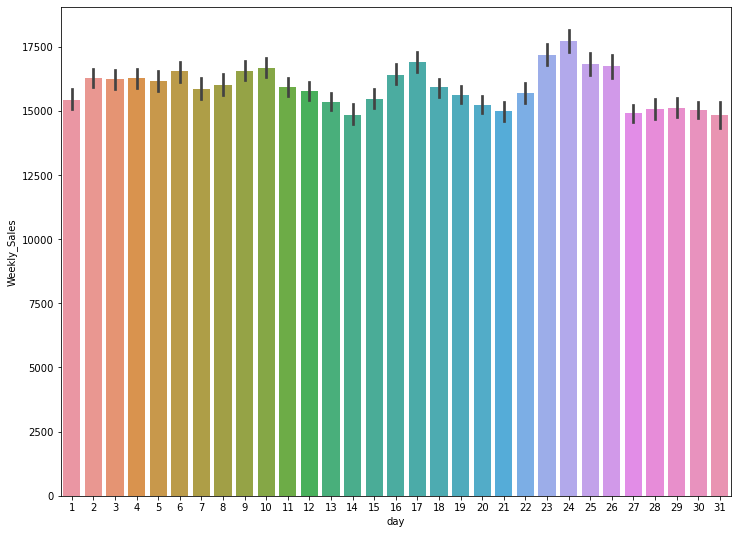

In [14]:
#Ska denna behållas?

import seaborn as sns

plt.figure(figsize=(12,9))
sns.barplot(x='day', y='Weekly_Sales', data=merged)

# Machine Learning algorithm

In [15]:
#Process training data
Xtrain, Ytrain = data_preprocessing(train, features, stores, True)

#Process test data
test_data = data_preprocessing(test, features, stores, False)

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=42)

In [17]:
#Method for calculating the evaluation metrics, Weighted Mean Absolute Error

def wmae(Y_test, y_pred, X_test):
    weight_sum = 0
    error_sum = 0

    for i in range(len(Y_test)):
        weight = 1+4*(X_test.iloc[i]['IsHoliday'])
        weight_sum += weight
        error_sum += weight*abs(Y_test.iloc[i]-y_pred[i])

    return (error_sum/weight_sum)

In [18]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=20) #max_depth=15
rf_regressor.fit(X_train, Y_train)
y_pred = rf_regressor.predict(X_test)

In [19]:
#Evaluation of Random Forest Regressor by MAE and WMAE

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Weighted Mean Absolute Error:', wmae(Y_test,y_pred,X_test))

Mean Absolute Error: 1324.8988441599263
Weighted Mean Absolute Error: 1522.9754116968875


In [20]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(10,50,10)} #n_estimators=20 was optimal
param_test2 = {'max_depth':range(5,20,5)} #max_depth=15 was optimal

rf_clf_svm = GridSearchCV(RandomForestRegressor(n_estimators=150, max_depth=15, random_state=0), param_test2, verbose = 1)
rf_clf_svm = rf_clf_svm.fit(X_train, Y_train)
print('')
print(rf_clf_svm.best_score_)
print(rf_clf_svm.best_params_)
print('')


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 24.3min finished

0.9657852754354908
{'max_depth': 15}



In [20]:
#XGB Regressor 

import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(n_estimators=60,reg_lambda=1.0,gamma=0,max_depth=15,min_child_weight=5)
xgb_regressor.fit(X_train, Y_train)
y_pred = xgb_regressor.predict(X_test)

In [21]:
#Evaluation of XGB Regressor by MAE and WMAE

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Weighted Mean Absolute Error:', wmae(Y_test,y_pred,X_test))

Mean Absolute Error: 1215.7713183366359
Weighted Mean Absolute Error: 1342.617539301759


In [22]:
#Method for creating submission file

def produce_output(y_pred, test_data):
    arr = [[]] * 0
    print("Percent uploaded: ")
    for i in range(len(y_pred)):
        res = str(int(test_data.iloc[i]['Store'])) + "_" + str(int(test_data.iloc[i]['Dept'])) + "_" + str(int(test_data.iloc[i]['Date']))[0:4] + "-" + str(int(test_data.iloc[i]['Date']))[4:6] + "-" + str(int(test_data.iloc[i]['Date']))[6:]
        arr.append([res, y_pred[i]])
        print((i/(len(y_pred)))*100, end="\r")
    
    df = pd.DataFrame(arr)
    df.columns = ['Id', 'Weekly_Sales']
    df.to_csv('submission_file.csv', index=False)


In [ ]:
#Create submission file 

produce_output(y_pred,test_data)

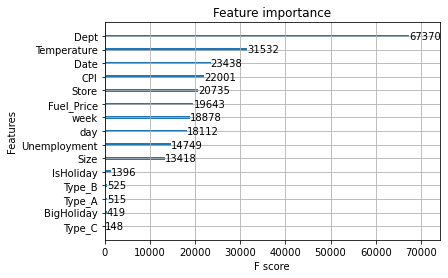

In [23]:
#Plot feature importance

from matplotlib import pyplot

xgb.plot_importance(xgb_regressor)
pyplot.show()